## Frequency of Bucket Spills (Fig-7)

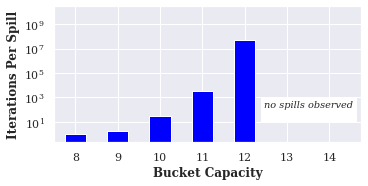

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='12')

df = pd.read_csv("base/maya6ways.Spills.stat", delimiter='\s+')

# Add Trials/Spill for Extra-Ways=0
id=len(df)+1
df.at[id, 'ExtraWaysPerSkew'] = 0
df.at[id, 'Trials/Spill'] = 1
#print (df)

fig = plt.figure(figsize=(5.5,2.5))
plt.bar(df['ExtraWaysPerSkew']+8, df['Trials/Spill'], align='center', width = 0.5, color='blue')


ax = plt.gca()

#xticks
print()
plt.xticks(df['ExtraWaysPerSkew']+8)
ax.set_xlim(7.5,14.75)

#axes labels
plt.xlabel('Bucket Capacity',weight = 'bold')
plt.ylabel('Iterations Per Spill',weight = 'bold')

#Set Y format & limts
ax.set_yscale('log')
ax.set_ylim(0.2,3*10**10)

#grid
ax.axis('on')
#ax.xaxis.grid()

#Text
ax.text(13.5, 10**2, 'no spills observed\n', style='italic',
        bbox={ 'facecolor': 'white','pad': 3}, family='serif',size='9.7',
        ha='center', va='center')

fig.savefig("Fig7.pdf",bbox_inches='tight')

## Bucket Probabilities - Analytical  (Fig-9)

    BallsInBucket-N     Pr_obs(N)     Pr_est(N)
0                 0  8.009220e-07           NaN
1                 1  1.421640e-05  1.441659e-05
2                 2  1.274660e-04  1.297483e-04
3                 3  7.579010e-04  7.784273e-04
4                 4  3.388810e-03  3.501052e-03
5                 5  1.213480e-02  1.257008e-02
6                 6  3.599670e-02  3.730640e-02
7                 7  8.936190e-02  9.251102e-02
8                 8  1.815450e-01  1.872190e-01
9                 9  2.786690e-01  2.844151e-01
10               10  2.695380e-01  2.681382e-01
11               11  1.160910e-01  1.085893e-01
12               12  1.226990e-02  9.629886e-03
13               13  1.061480e-04  6.420095e-05
14               14  1.174890e-08  2.649704e-09
15               15  0.000000e+00  4.212560e-18
16               16  0.000000e+00  9.981934e-36


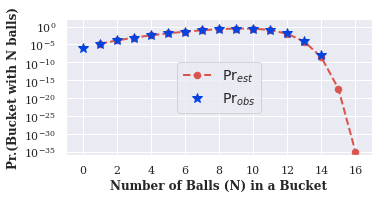

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


##### PROCESS ANALYTICAL RESULTS ########

Pr_df = pd.read_csv("base/maya6ways.BucketProb.stat", delimiter='\s+')
p_0 = Pr_df['Pr_obs(N)'][0]
Pr_df.at[1,'Pr_est(N)'] = 9*(p_0**2 + 2*p_0 - 2*p_0*p_0)

p_leqN = p_0 + Pr_df.at[1,'Pr_est(N)']
## Using Eq-5
for N in range(1,12):
    p_N = Pr_df.at[N,'Pr_est(N)']
    Pr_df.at[N+1,'Pr_est(N)'] = 9/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr_df.at[N+1,'Pr_est(N)']
## Using Eq-6
for N in range(12,16):
    p_N = Pr_df.at[N,'Pr_est(N)']
    Pr_df.at[N+1,'Pr_est(N)'] = 9/(N+1)*(p_N**2)
    
print (Pr_df)

##### PLOT RESULTS #########

#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='14')

fig = plt.figure(figsize=(5.5,2.5))
ax1 = plt.gca()

#Plot
ax1 = Pr_df.set_index('BallsInBucket-N')['Pr_est(N)'].plot(label='$\Pr_{est}$',color=sns.xkcd_rgb["pale red"],linestyle="--",linewidth=2, marker="o", markersize=6.5)
ax1 = Pr_df.set_index('BallsInBucket-N')['Pr_obs(N)'].plot(ax=ax1,label='$\Pr_{obs}$',color=sns.xkcd_rgb["blue"], marker="*", markersize=10, linewidth=0)

#Get Axes
ax1 = plt.gca()

#legend
legend_properties={'size':14}
ax1.legend(loc='center',prop=legend_properties)


#xticks
ax1.set_xlim(-1,17)

#axes labels
plt.xlabel('Number of Balls (N) in a Bucket',weight='bold')
plt.ylabel('Pr.(Bucket with N balls)',weight = 'bold')

#Set Y format & limts
ax1.set_yscale('log')
ax1.set_ylim(10**-36,100)
ax1.set_yticks([1,10**-5,10**-10,10**-15,10**-20,10**-25,10**-30,10**-35])

#grid
ax1.axis('on')

fig.savefig("Fig8.pdf",bbox_inches='tight',dpi=300)

## Frequency of Bucket Spills - Analytical (Fig-10)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from matplotlib.ticker import PercentFormatter
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x


##### PROCESS RESULTS ########
# Read Empirical Results
df1 = pd.read_csv("base/maya6ways.Spills.stat", delimiter='\s+')
#print (df1)
Spill_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Obs','SpillTries_Est'])
for i in range(0,4):
    Spill_df.at[i,'Bucket_Capacity'] = df1.at[i,'ExtraWaysPerSkew'] + 9
    Spill_df.at[i,'SpillTries_Obs'] = df1.at[i,'Trials/Spill']
    
Spill_df.at[4,'Bucket_Capacity'] = Spill_df.at[3,'Bucket_Capacity'] + 1
Spill_df.at[5,'Bucket_Capacity'] = Spill_df.at[4,'Bucket_Capacity'] + 1

# Calculation of Estimated Spills from Analytical Probabilities.
for i in range(0,6): 
    Spill_df.at[i,'SpillTries_Est'] = 1/Pr_df.at[Spill_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2
# print(Spill_df)

# ##### PLOT RESULTS ########

# #Set Font Size
# plt.rc('font', family='serif')
# plt.rc('font', size='14')


# fig = plt.figure(figsize=(5.5,2.5))

# ax1 = Spill_df.set_index('Bucket_Capacity')['SpillTries_Est'].plot(label='Balls/Spill$_{est}$',color=sns.xkcd_rgb["pale red"],linestyle="--",linewidth=2, marker="o", markersize=6.5)
# ax1 = Spill_df.set_index('Bucket_Capacity')['SpillTries_Obs'].plot(ax=ax1,label='Balls/Spill$_{obs}$',color=sns.xkcd_rgb["blue"], marker="*", markersize=10, linewidth=0)

# ax1 = plt.gca()

# #legend
# ax1.legend(loc='upper center',prop={"size":14})

# #xticks
# ax1.set_xlim(9,16)

# #axes labels
# plt.xlabel('Bucket Capacity (W)',weight='bold')
# plt.ylabel('Ball Throws Per Spill',weight = 'bold')

# #Set Y format & limts
# ax1.set_yscale('log')
# ax1.set_ylim(1e-2,1e37)
# ax1.set_yticks([1.,10**5.,10**10.,10**15.,10**20.,10**25.,10**30.,10**35.])

# #grid
# #ax1.axis('on')


# fig.savefig("Fig10.pdf",bbox_inches='tight')

## Frequency of SAE (Table-1)

In [8]:
import math

## Function to Format Time:
def format_time (x):
    digits = int(math.log10(x))+1
    if(digits <= 3):
        return str(int(round(x)))+" ns"
    x_us = x/1000
    digits = int(math.log10(x_us))+1
    if(digits <= 3):
        return str(int(x_us)) + " us"
    x_ms = x_us/1000
    digits = int(math.log10(x_ms))+1
    if(digits <= 3):
        return  str(int(x_ms)) + " ms"
    x_s = x_ms/1000
    digits = int(math.log10(x_s))+1
    if(digits <3):
        return  str(int(x_s))+ " s"
    x_min = x_s/60
    digits = int(math.log10(x_min))+1
    if(digits <3):
        return  str(int(x_min)) + " min"
    x_hr = x_min/60
    digits = int(math.log10(x_hr))+1
    if(digits <3):
        return  str(int((x_hr)))+ " hr"
    x_day = x_hr/24
    digits = int(math.log10(x_day))+1
    if(digits <3):
        return  str(int(x_day))+ " days"
    x_yr = x_day/365
    return  np.format_float_scientific(x_yr,precision=1, exp_digits=2)+ " yrs"    


## Create DataFrame
FreqSAE_df = pd.DataFrame(columns=['Ways in each Skew (Base + Extra)','Installs Per SAE','Time Per SAE'])

## Ways = 9 + 0
FreqSAE_df.at[0,'Ways in each Skew (Base + Extra)'] = "9 + 0"
FreqSAE_df.at[0,'Installs Per SAE'] = 1

## Ways = "9 + 1" to "9 + 4": Copy from Empirically Observed Balls/Spill_obs in above graph
for i in range(1,5):
    FreqSAE_df.at[i,'Ways in each Skew (Base + Extra)'] = "9 + "+str(i)
    FreqSAE_df.at[i,'Installs Per SAE'] = Spill_df.at[i-1,'SpillTries_Obs']

## Ways = "9 + 5" to "9 + 6": Copy from Analytically Calculated Balls/Spill_obs in above graph
for i in range(5,7):
    FreqSAE_df.at[i,'Ways in each Skew (Base + Extra)'] = "9 + "+str(i)
    FreqSAE_df.at[i,'Installs Per SAE'] = Spill_df.at[i-1,'SpillTries_Est']

## Update the label of the last entry "9 + 6 (default)"
FreqSAE_df.at[6,'Ways in each Skew (Base + Extra)'] = FreqSAE_df.at[6,'Ways in each Skew (Base + Extra)']  + " (default)"

## Calculate Time Per SAE
FreqSAE_df['Time Per SAE'] = FreqSAE_df['Installs Per SAE'] * 1
FreqSAE_df['Time Per SAE'] = FreqSAE_df['Time Per SAE'].apply(lambda x: format_time(x))

## Round numbers
FreqSAE_df.round({'Installs Per SAE': 1}) 
FreqSAE_df['Installs Per SAE'] = FreqSAE_df['Installs Per SAE'].apply(lambda x: np.format_float_scientific(x,precision=0, exp_digits=2))

## Print Table
print(FreqSAE_df)

  Ways in each Skew (Base + Extra) Installs Per SAE Time Per SAE
0                            9 + 0           1.e+00         1 ns
1                            9 + 1           2.e+00         2 ns
2                            9 + 2           3.e+01        29 ns
3                            9 + 3           3.e+03         3 us
4                            9 + 4           5.e+07        47 ms
5                            9 + 5           1.e+17  4.5e+00 yrs
6                  9 + 6 (default)           6.e+34  1.8e+18 yrs


## Sensitivity of SAE to LLC-Associativity (Table-4)

In [9]:
######## CALCULATE SAE USING ANALYTICAL MODEL FOR LLC-ASSOCIATIVITY = 8,36 ########


##### LLC-ASSOC = 36 ####
Pr36way_df = pd.read_csv("sensitivity/maya12ways.BucketProb.stat", delimiter='\s+')
ways_per_skew = 18

## Setting initial conditions
p_2 = Pr36way_df['Pr_obs(N)'][2]
Pr36way_df.at[3,'Pr_est(N)'] = ways_per_skew/(2+1)*(p_2**2 + 2*p_2 - 2*p_2*(p_2))
p_leqN = p_2 + Pr36way_df.at[3,'Pr_est(N)']

## Bucket-Probabilities Using Eq-5
for N in range(3,23):
    p_N = Pr36way_df.at[N,'Pr_est(N)']
    Pr36way_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr36way_df.at[N+1,'Pr_est(N)']
## Bucket-Probabilities Using Eq-6
for N in range(23,37):
    p_N = Pr36way_df.at[N,'Pr_est(N)']
    Pr36way_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2)   
#print (Pr36way_df)

## Calculate Spills using Eq-7
Spill36way_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Est'])
for i in range(0,6): 
    Spill36way_df.at[i,'Bucket_Capacity'] = i + 1 + ways_per_skew
    Spill36way_df.at[i,'SpillTries_Est'] = 1/Pr36way_df.at[Spill36way_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2
#print(Spill36way_df)

##### LLC-ASSOC = 8 ####
Pr8way_df = pd.read_csv("sensitivity/maya3ways.BucketProb.stat", delimiter='\s+')
ways_per_skew = 4

## Setting initial conditions
p_0 = Pr8way_df['Pr_obs(N)'][0]
Pr8way_df.at[1,'Pr_est(N)'] = ways_per_skew/(0+1)*(p_0**2 + 2*p_0 - 2*p_0*p_0)

p_leqN = p_0+ Pr8way_df.at[1,'Pr_est(N)']

## Bucket-Probabilities Using Eq-5
for N in range(1,6):
    p_N = Pr8way_df.at[N,'Pr_est(N)']
    Pr8way_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr8way_df.at[N+1,'Pr_est(N)']
## Bucket-Probabilities Using Eq-6
for N in range(6,16):
    p_N = Pr8way_df.at[N,'Pr_est(N)']
    Pr8way_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2)   
#print (Pr8way_df)

## Calculate Spills using Eq-7
Spill8way_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Est'])
for i in range(0,6): 
    Spill8way_df.at[i,'Bucket_Capacity'] = i + 1 + ways_per_skew
    Spill8way_df.at[i,'SpillTries_Est'] = 1/Pr8way_df.at[Spill8way_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2
#print(Spill8way_df)

######## CREATE TABLE FOR LLC-ASSOC = 8,18,36 ########

## Create DataFrame
SensFreqSAE_df = pd.DataFrame(columns=['Over-Provisioning','LLC-Assoc 8-ways','LLC-Assoc 18-ways','LLC-Assoc 36-ways'])
#1 extra way/skew
extra_ways_per_skew = [4,5,6]
for i in range(len(extra_ways_per_skew)):
    SensFreqSAE_df.at[i,'Over-Provisioning'] = str(extra_ways_per_skew[i])+' extra way/skew'
    SensFreqSAE_df.at[i,'LLC-Assoc 8-ways'] = Spill8way_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    SensFreqSAE_df.at[i,'LLC-Assoc 18-ways'] = Spill_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    SensFreqSAE_df.at[i,'LLC-Assoc 36-ways'] = Spill36way_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    
## Format Table:
SensFreqSAE_df['LLC-Assoc 8-ways'] = SensFreqSAE_df['LLC-Assoc 8-ways'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))
SensFreqSAE_df['LLC-Assoc 18-ways'] = SensFreqSAE_df['LLC-Assoc 18-ways'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))
SensFreqSAE_df['LLC-Assoc 36-ways'] = SensFreqSAE_df['LLC-Assoc 36-ways'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))

with pd.option_context('expand_frame_repr', False):
    print (SensFreqSAE_df)

  Over-Provisioning       LLC-Assoc 8-ways      LLC-Assoc 18-ways  LLC-Assoc 36-ways
0  4 extra way/skew         2.1e+10 (21 s)       2.4e+08 (242 ms)     6.1e+06 (6 ms)
1  5 extra way/skew  2.3e+21 (7.1e+04 yrs)  1.4e+17 (4.5e+00 yrs)    6.1e+07 (61 ms)
2  6 extra way/skew  3.2e+43 (1.0e+27 yrs)  5.6e+34 (1.8e+18 yrs)  6.7e+15 (77 days)


In [6]:
######## CALCULATE SAE USING ANALYTICAL MODEL FOR REUSE = 1,5,7 ########


##### REUSE = 1 ####
Pr1reuse_df = pd.read_csv("sensitivity/maya6ways.Reuse1.BucketProb.stat", delimiter='\s+')
ways_per_skew = 7

## Setting initial conditions
p_2 = Pr1reuse_df['Pr_obs(N)'][2]
Pr1reuse_df.at[3,'Pr_est(N)'] = ways_per_skew/(2+1)*(p_2**2 + 2*p_2 - 2*p_2*(p_2))
p_leqN = p_2 + Pr1reuse_df.at[3,'Pr_est(N)']

## Bucket-Probabilities Using Eq-5
for N in range(3,12):
    p_N = Pr1reuse_df.at[N,'Pr_est(N)']
    Pr1reuse_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr1reuse_df.at[N+1,'Pr_est(N)']
## Bucket-Probabilities Using Eq-6
for N in range(12,14):
    p_N = Pr1reuse_df.at[N,'Pr_est(N)']
    Pr1reuse_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2)   
#print (Pr1reuse_df)

## Calculate Spills using Eq-7
Spill1reuse_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Est'])
for i in range(0,6): 
    Spill1reuse_df.at[i,'Bucket_Capacity'] = i + 1 + ways_per_skew
    Spill1reuse_df.at[i,'SpillTries_Est'] = 1/Pr1reuse_df.at[Spill1reuse_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2
#print(Spill1reuse_df)

##### REUSE = 5 ####
Pr5reuse_df = pd.read_csv("sensitivity/maya6ways.Reuse5.BucketProb.stat", delimiter='\s+')
ways_per_skew = 11

## Setting initial conditions
p_2 = Pr5reuse_df['Pr_obs(N)'][2]
Pr5reuse_df.at[3,'Pr_est(N)'] = ways_per_skew/(2+1)*(p_2**2 + 2*p_2 - 2*p_2*(p_2))
p_leqN = p_2 + Pr5reuse_df.at[3,'Pr_est(N)']

## Bucket-Probabilities Using Eq-5
for N in range(3,16):
    p_N = Pr5reuse_df.at[N,'Pr_est(N)']
    Pr5reuse_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr5reuse_df.at[N+1,'Pr_est(N)']
## Bucket-Probabilities Using Eq-6
for N in range(16,18):
    p_N = Pr5reuse_df.at[N,'Pr_est(N)']
    Pr5reuse_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2)   
#print (Pr5reuse_df)

## Calculate Spills using Eq-7
Spill5reuse_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Est'])
for i in range(0,6): 
    Spill5reuse_df.at[i,'Bucket_Capacity'] = i + 1 + ways_per_skew
    Spill5reuse_df.at[i,'SpillTries_Est'] = 1/Pr5reuse_df.at[Spill5reuse_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2
#print(Spill5reuse_df)

##### REUSE = 7 ####
Pr7reuse_df = pd.read_csv("sensitivity/maya6ways.Reuse7.BucketProb.stat", delimiter='\s+')
ways_per_skew = 13

## Setting initial conditions
p_2 = Pr7reuse_df['Pr_obs(N)'][2]
Pr7reuse_df.at[3,'Pr_est(N)'] = ways_per_skew/(2+1)*(p_2**2 + 2*p_2 - 2*p_2*(p_2))
p_leqN = p_2 + Pr7reuse_df.at[3,'Pr_est(N)']

## Bucket-Probabilities Using Eq-5
for N in range(3,18):
    p_N = Pr7reuse_df.at[N,'Pr_est(N)']
    Pr7reuse_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2 + 2*p_N - 2*p_N*p_leqN)
    p_leqN = p_leqN + Pr7reuse_df.at[N+1,'Pr_est(N)']
## Bucket-Probabilities Using Eq-6
for N in range(18,20):
    p_N = Pr7reuse_df.at[N,'Pr_est(N)']
    Pr7reuse_df.at[N+1,'Pr_est(N)'] = ways_per_skew/(N+1)*(p_N**2)   
#print (Pr7reuse_df)

## Calculate Spills using Eq-7
Spill7reuse_df = pd.DataFrame(columns=['Bucket_Capacity','SpillTries_Est'])
for i in range(0,6): 
    Spill7reuse_df.at[i,'Bucket_Capacity'] = i + 1 + ways_per_skew
    Spill7reuse_df.at[i,'SpillTries_Est'] = 1/Pr7reuse_df.at[Spill7reuse_df.at[i,'Bucket_Capacity'],'Pr_est(N)']**2
#print(Spill7reuse_df)

######## CREATE TABLE FOR REUSE = 1,3,5,7 ########

## Create DataFrame
SensFreqSAE_df = pd.DataFrame(columns=['Over-Provisioning','Reuse 1-way','Reuse 3-ways','Reuse 5-ways', 'Reuse 7-ways'])

extra_ways_per_skew = [5,6]
for i in range(len(extra_ways_per_skew)):
    SensFreqSAE_df.at[i,'Over-Provisioning'] = str(extra_ways_per_skew[i])+' extra way/skew'
    SensFreqSAE_df.at[i,'Reuse 1-way'] = Spill1reuse_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    SensFreqSAE_df.at[i,'Reuse 3-ways'] = Spill_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    SensFreqSAE_df.at[i,'Reuse 5-ways'] = Spill5reuse_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    SensFreqSAE_df.at[i,'Reuse 7-ways'] = Spill7reuse_df.at[extra_ways_per_skew[i]-1,'SpillTries_Est']
    
## Format Table:
SensFreqSAE_df['Reuse 1-way'] = SensFreqSAE_df['Reuse 1-way'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))
SensFreqSAE_df['Reuse 3-ways'] = SensFreqSAE_df['Reuse 3-ways'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))
SensFreqSAE_df['Reuse 5-ways'] = SensFreqSAE_df['Reuse 5-ways'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))
SensFreqSAE_df['Reuse 7-ways'] = SensFreqSAE_df['Reuse 7-ways'].apply(
    lambda x: (np.format_float_scientific(x,precision=1, exp_digits=2)+ ' ('+format_time(x)+')'))

with pd.option_context('expand_frame_repr', False):
    print (SensFreqSAE_df)

  Over-Provisioning            Reuse 1-way           Reuse 3-ways           Reuse 5-ways           Reuse 7-ways
0  5 extra way/skew      1.5e+15 (17 days)   2.e+16 (6.2e-01 yrs)        2.5e+14 (70 hr)        6.6e+13 (18 hr)
1  6 extra way/skew  7.6e+30 (2.4e+14 yrs)  1.1e+33 (3.4e+16 yrs)  1.5e+29 (4.9e+12 yrs)  9.2e+27 (2.9e+11 yrs)
